#Data Proprocessing

In [ ]:
import torch
from torch import nn
torch.__version__

'1.13.1+cu116'

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"


In [ ]:
import requests
import zipfile
from pathlib import Path

data_path = Path("data/")
image_path = data_path/ "pizza_steak_sushi"

if image_path.is_dir() is False:
  image_path.mkdir(parents = True, exist_ok = True) 

with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
  request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
  f.write(request.content)

with zipfile.ZipFile(data_path/ "pizza_steak_sushi.zip", "r" ) as zip_ref:
  zip_ref.extractall(image_path)

In [ ]:
import os
def walk_through_dir(dir_path):
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [ ]:
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.


In [ ]:
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

In [ ]:
import random
from PIL import Image


#random.seed(42)

image_path_list = list(image_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)
random_image_path

PosixPath('data/pizza_steak_sushi/train/steak/214320.jpg')

In [ ]:
image = Image.open(random_image_path)
image_class = random_image_path.parent.stem

In [ ]:
image.height, image.width, image_class

(383, 512, 'steak')

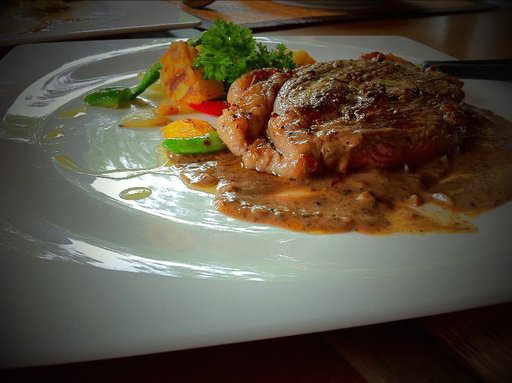

In [ ]:
image

In [ ]:
import numpy as np


In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
dataclass_transform = transforms.Compose(
    [
        transforms.Resize(size = (64,64)),
        transforms.RandomHorizontalFlip(p = 0.5),
        transforms.ToTensor()
    ]
)

In [ ]:
dataclass_transform(image).shape

torch.Size([3, 64, 64])

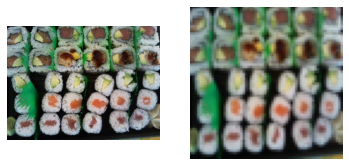

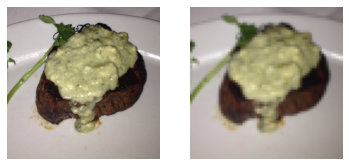

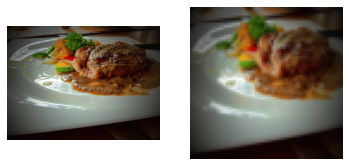

In [ ]:
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n=2, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0)  # permute [H,W,C] 
            ax[1].imshow(transformed_image) 
            ax[1].axis("off")


plot_transformed_images(image_path_list, 
                        transform=dataclass_transform, 
                        n=3)


In [ ]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir, 
                                  transform=dataclass_transform,
                                  target_transform=None) 

test_data = datasets.ImageFolder(root=test_dir, 
                                 transform=dataclass_transform,
                                 target_transform = None)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [ ]:
class_names = train_data.class_to_idx
class_names

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [ ]:
img, label = train_data[0][0], train_data[0][1]
img.shape

torch.Size([3, 64, 64])

(-0.5, 63.5, 63.5, -0.5)

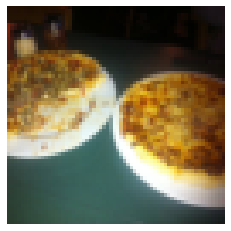

In [ ]:
fig, ax = plt.subplots(1, 1)
ax.imshow(img.permute(1,2,0)) 
ax.axis("off")


In [ ]:
from torch.utils.data import DataLoader
BATCH_SIZE = 1
train_dataloader = DataLoader(
    dataset = train_data, 
    batch_size = BATCH_SIZE,
    num_workers = 1,
    shuffle = True
)
test_dataloader = DataLoader(
    dataset = test_data,
    batch_size = BATCH_SIZE,
    num_workers = 1,
    shuffle = False
)


#Higher Level


In [ ]:
def find_classes(directory: str):
  classes = sorted(entry.name for entry in os.scandir(directory) if entry.is_dir())
  if not classes:
    raise FileNotFoundError(f"Error")
  class_to_idx = {class_name: i for i, class_name in enumerate(classes)}
  return classes, class_to_idx


In [ ]:
from torch.utils.data import Dataset
import pathlib


class ImageFolderCustom(Dataset):
  def __init__(self, targ_dir: str, transform = None):
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    self.classes, self.class_to_idx = find_classes(targ_dir)


  def load_image(self, index):
    image_path = self.paths[index]
    return Image.open(image_path)


  def __len__(self):
    return len(self.paths)

  def __getitem__(self, index):
    img  = self.load_image(index)
    class_name = self.paths[index].parent.name
    class_idx = self.class_to_idx[class_name]
    if self.transform:
      return self.transform(img), class_idx # return data, label (X, y)
    else:
      return img, class_idx # return data, label (X, y)


In [ ]:
train_transform = transforms.Compose(
    [
        transforms.Resize(size = (64,64)),
        transforms.RandomHorizontalFlip(p = 0.5),
        transforms.ToTensor()
    ]
)


test_transform = transforms.Compose(
    [
        transforms.Resize(size = (64,64)),
        transforms.ToTensor()
    ]
)

In [ ]:
train_data_custom = ImageFolderCustom(targ_dir = train_dir,
                                      transform = train_transform)

test_data_custom = ImageFolderCustom(targ_dir = test_dir,
                                     transform = test_transform)




In [ ]:
len(train_data_custom)
train_data_custom.classes

['pizza', 'steak', 'sushi']

In [ ]:
import matplotlib.pyplot as plt

def plot_transformed_images(image_paths, transform, n=2, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0)  # permute [H,W,C] 
            ax[1].imshow(transformed_image) 
            ax[1].axis("off")

In [ ]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader_custom = DataLoader(dataset = train_data_custom, 
                                     batch_size = BATCH_SIZE,
                                     shuffle = True)

test_data_loader = DataLoader(dataset = train_data_custom, 
                                     batch_size = BATCH_SIZE,
                                     shuffle = False)

In [ ]:
img_custom, label_custom = next(iter(train_dataloader_custom))
img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

In [ ]:
# TrivialAugment
from torchvision import transforms

train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31), 
    transforms.ToTensor() 
])


test_transforms = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor()
])

In [ ]:
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path

PosixPath('data/pizza_steak_sushi')

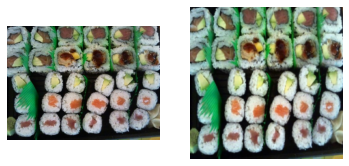

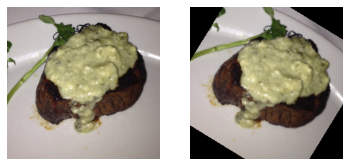

In [ ]:
plot_transformed_images(image_path_list, train_transforms, n=2, seed=42)

# Model_0 without Augmentation


In [ ]:
simple_transform = transforms.Compose([
    transforms.Resize(size = (256,256)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])


test_simple_transform = transforms.Compose([
    transforms.Resize(size = (256,256)),
    transforms.ToTensor()
])

In [ ]:
from torchvision import datasets
train_data_simple = datasets.ImageFolder(root=train_dir, transform=simple_transform)
test_data_simple = datasets.ImageFolder(root=test_dir, transform=test_simple_transform)

import os
from torch.utils.data import DataLoader
 
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()


train_dataloader_simple = DataLoader(train_data_simple, 
                                     batch_size=BATCH_SIZE, 
                                     shuffle=True, 
                                     num_workers=NUM_WORKERS)

test_dataloader_simple = DataLoader(test_data_simple, 
                                    batch_size=BATCH_SIZE, 
                                    shuffle=False, 
                                    num_workers=NUM_WORKERS)

train_dataloader_simple, test_dataloader_simple

(<torch.utils.data.dataloader.DataLoader at 0x7f5921872fd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f5914f5f0d0>)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape : int, hidden_units : int, output_shape : int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
      )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units, out_channels = hidden_units,
                  kernel_size = 3, stride = 1, padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
      )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 40960, out_features = output_shape)
    )
  def forward(self, x: torch.Tensor):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    #print(x.shape)
    x = self.classifier(x)
    return x

torch.manual_seed(42)
model_0 = TinyVGG(
    input_shape = 3,
    hidden_units = 10,
    output_shape = len(train_data_custom.classes)
).to(device)

In [ ]:
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=40960, out_features=3, bias=True)
  )
)

In [ ]:
model_0(img_custom)

RuntimeError: ignored

In [ ]:
!pip install torchinfo
from torchinfo import summary

In [ ]:
summary(model_0, input_size=[1, 3, 64, 64])

RuntimeError: ignored

In [ ]:
!pip install tqdm

In [ ]:
def train_step(model : torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  model.train()
  train_loss, train_acc = 0, 0
  for batch, (X, y) in enumerate(dataloader):
    X = X.to(device)
    y = y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim = 1), dim = 1)
    train_acc += (y_pred_class == y).sum().item()/len(y_pred)

  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)
  return train_loss, train_acc


In [ ]:
def test_step(model: torch.nn.Module, 
              dataloader: torch.utils.data.DataLoader, 
              loss_fn: torch.nn.Module):
    model.eval() 
    test_loss, test_acc = 0, 0
    

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            
            X, y = X.to(device), y.to(device)
            test_pred_logits = model(X)
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [ ]:
from tqdm.auto import tqdm
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module,
          epochs: int = 10):
  results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }
  for epoch in tqdm(range(epochs)):
    train_loss, train_acc = train_step(model=model, dataloader=train_dataloader,
                                           loss_fn=loss_fn, optimizer=optimizer)
    test_loss, test_acc = test_step(model=model, dataloader=test_dataloader, loss_fn=loss_fn)
    print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}")
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)
  return results

In [ ]:
def plot_loss_curves(results):
    loss = results['train_loss']
    test_loss = results['test_loss']
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    epochs = range(len(results['train_loss']))

    plt.figure(figsize=(15, 7))


    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [ ]:
len(train_dataloader_simple), len(test_dataloader_simple)

(8, 3)

In [ ]:

torch.manual_seed(42) 
torch.cuda.manual_seed(42)

NUM_EPOCHS = 100


loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.1)

from timeit import default_timer as timer 
start_time = timer()
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader_simple,
                        test_dataloader=test_dataloader_simple,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=NUM_EPOCHS)
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2800.5926 | train_acc: 0.4180 | test_loss: 161.4836 | test_acc: 0.2604
Epoch: 2 | train_loss: 15.5090 | train_acc: 0.4258 | test_loss: 1.1580 | test_acc: 0.2604
Epoch: 3 | train_loss: 1.0842 | train_acc: 0.4258 | test_loss: 1.1652 | test_acc: 0.2604
Epoch: 4 | train_loss: 18.6204 | train_acc: 0.3086 | test_loss: 1.1419 | test_acc: 0.2604
Epoch: 5 | train_loss: 36.8046 | train_acc: 0.4258 | test_loss: 1.1194 | test_acc: 0.2604
Epoch: 6 | train_loss: 1.1086 | train_acc: 0.3047 | test_loss: 1.1220 | test_acc: 0.2604
Epoch: 7 | train_loss: 1.0898 | train_acc: 0.4453 | test_loss: 1.1445 | test_acc: 0.1979
Epoch: 8 | train_loss: 1.1234 | train_acc: 0.2930 | test_loss: 1.1722 | test_acc: 0.1979
Epoch: 9 | train_loss: 1.1319 | train_acc: 0.2930 | test_loss: 1.1534 | test_acc: 0.2604
Epoch: 10 | train_loss: 1.0925 | train_acc: 0.4258 | test_loss: 1.0813 | test_acc: 0.2604
Epoch: 11 | train_loss: 1.0870 | train_acc: 0.4258 | test_loss: 1.1012 | test_acc: 0.2604
Epoch: 12 |

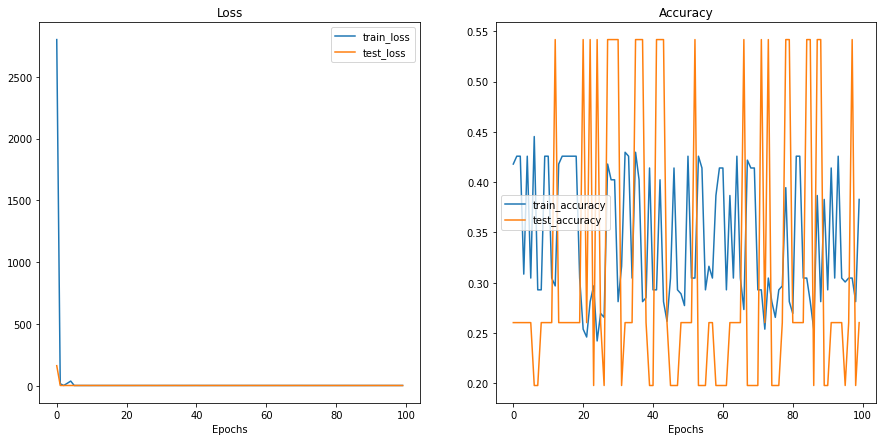

In [ ]:
plot_loss_curves(model_0_results)